<a href="https://colab.research.google.com/github/Bohdan-at-Kulinich/Machine-Learning/blob/main/Class_Regress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the imdb dataset  

 # keep only the top 10,000 most frequently occuring words in the training data
 # rare words are discarded to work with the data of manageable size
 # the whole ds contains 85,585 unique words, some occuring in a single sample
 # which can't be meaninfully used in classification

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 


17473536/17464789 [==============================] - 0s 0us/step


In [2]:
 # train_data and test_data are lists of reviews
 # each review is a list of word indices
 # train_labes and test_labels are lists of 0 (negative) and 1 (positive)

train_data[0] 
train_labels[0] 


1

In [ ]:
# the max value of the word index:
# find the max val for each seq and then extract the max from the final list


max([max(sequence) for sequence in train_data]) 

9999

In [3]:
# decoding reviews back to words:

# create a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# reverse the dictionary, mapping indices to words
reverse_word_index = dict (
    [(value, key) for (key, value) in word_index.items()])

# indices are offset by 3 because 0, 1, 2 are reserved for 'padding', 'start of sequence', and 'unknown'
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[1]])



1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
print(word_index)

In [ ]:
print(reverse_word_index)

In [ ]:
print(decoded_review)

### Preparing the data 

In [ ]:
# we need to transform the lists of integers into tensors:
# 1) pad the lists to make them of the same length and turn them into an integer tensor of shape (samples, max_length)
# start the model with the Embedding layer
# 2) multi-hot encode the lists to turn them into vectors of 0, 1. 
# use the Dense layer 

In [4]:
# Encoding the integer sequences via multi-hot encoding 

import numpy as np 
def vectroize_sequences(sequences, dimension=10000):
  # create an all-zero matrix
  results = np.zeros((len(sequences), dimension))
  # set specific indices of results matrix to 1
  for i, sequence in enumerate(sequences): # label each sequence in the data with an integer
    for j in sequence:  # go over each index in the sequence list  
      results[i, j] = 1
  return results 

# vectorize the training and test data 
x_train = vectroize_sequences(train_data)
x_test  = vectroize_sequences(test_data) 

# vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building the model 

In [5]:
# the input data is vectors, the labels are scalars (0, 1)
# such kind of situations is handled well with a plain stack of densely connected (Dense) layers with relu activation 

# Architecture: three-layer model 
# two intermediate layers with 16 units each
# third layer to output the scalar predictions 

from tensorflow import keras 
from tensorflow.keras import layers 

# each Dense layer with a relu activation implements the chain of tensor operations:
# output = relu(dot(input, W) + b)
# with 16 units the weight matrix W will have shape (input_dimension, 16)
# relu (rectified linear unit) is meant to zero out negative values
# sigmoid squashes arbitrary values into the [0, 1] interval, outputing something that can be interpreted as probability 
model = keras.Sequential([ 
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
# Loss function: 
# for a binary classification problem with the output in terms of probability, 
# we would use binary_crossentropy loss. 
# (crossentropy measures the distance between probability distributions)

# Optimizer: rmsprop = a good default choice for any problem 

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Validating your approach 

In [7]:
# create a validation set by setting appart 10,000 samples from the original training data 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# training the model: 
# train the model for 20 epochs (iterations over all samples in the training data)
# in mini-batches of 512 samples 
# monitro loss and accuracy using the validation data 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [9]:
# model.fit() return a History object, which has a member history = dictionary containing data about the training proccess. 

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

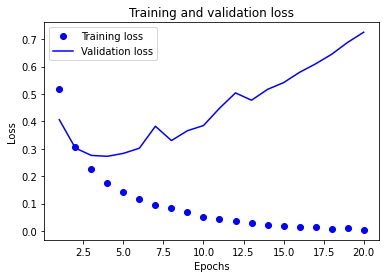

In [10]:
# use Matplotlib to plot the training and validation loss: 

import matplotlib.pyplot as plt 

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo is for blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b is for blue line 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 


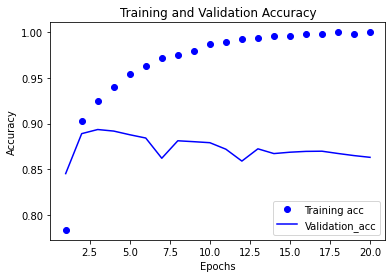

In [12]:
# plottin the training and validation accuracy:

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label="Validation_acc")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Overfitting: after the 7th epoch, we are optimizing on the training data and 
# we end up learning representations specific to the training data and don't generalize to data outside of the training set. 
# To prevent overfitting we need to stop training after 7 epochs and then evaluate it on the test data. 

In [ ]:
# Retraining the model from scratch for four epochs end evaluate it on the test data 

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)


In [18]:
results # test loss and accuracy 

[0.3009701073169708, 0.8805199861526489]

In [ ]:
# Generate the likelihood of reviews being positive by using the predict method:

model.predict(x_test)

### Experiments

In [ ]:
# Add one more representation Dense layer: 
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

In [22]:
results # no difference in comperison to just two representation layers

[0.3009701073169708, 0.8805199861526489]

In [24]:
# Leave only one representation Dense layer:

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4382 - accuracy: 0.8309
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2697 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2148 - accuracy: 0.9253
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2889 - accuracy: 0.8828


In [25]:
result # loss slightly decreased and accuracy incresed. Straing? 

[0.28885480761528015, 0.8827599883079529]